In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

In [7]:
df=pd.read_csv("wine.csv")
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [8]:
df.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

# Hierarchical clustering

In [9]:
X=df.iloc[:,1:].values
y=df.iloc[:,0:1].values

In [10]:
def nor_func (i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [11]:
nor_funct= nor_func(df.iloc[:,1:])

In [12]:
nor_funct

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.705263,0.970356,0.582888,0.510309,0.271739,0.241379,0.056962,0.735849,0.205047,0.547782,0.130081,0.172161,0.329529
174,0.623684,0.626482,0.598930,0.639175,0.347826,0.282759,0.086498,0.566038,0.315457,0.513652,0.178862,0.106227,0.336662
175,0.589474,0.699605,0.481283,0.484536,0.543478,0.210345,0.073840,0.566038,0.296530,0.761092,0.089431,0.106227,0.397290
176,0.563158,0.365613,0.540107,0.484536,0.543478,0.231034,0.071730,0.754717,0.331230,0.684300,0.097561,0.128205,0.400856


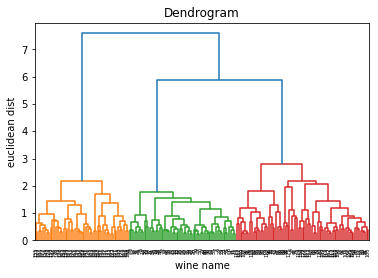

In [13]:
dendo=sch.dendrogram(sch.linkage(nor_funct,method='ward'))
plt.title("Dendrogram")
plt.xlabel("wine name")
plt.ylabel("euclidean dist")
plt.show()

In [14]:
hc=AgglomerativeClustering(n_clusters=3,affinity='euclidean', linkage='ward')


In [15]:
y_hc= hc.fit_predict(X)
y_hc

array([0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 1, 2,
       1, 1, 2, 2, 2, 1, 1, 0, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1,
       2, 2, 1, 1, 1, 1, 1, 0, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2,
       2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1], dtype=int64)

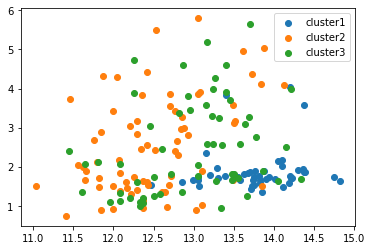

In [16]:
plt.scatter(X[y_hc==0,0],X[y_hc==0,1], label='cluster1')
plt.scatter(X[y_hc==1,0],X[y_hc==1,1],label='cluster2')
plt.scatter(X[y_hc==2,0],X[y_hc==2,1], label='cluster3')
plt.legend()
plt.show()

In [17]:
df['cluster1','cluster2','cluster3']=y_hc

In [18]:
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,"(cluster1, cluster2, cluster3)"
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


In [19]:
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,"(cluster1, cluster2, cluster3)"
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


In [20]:
df1=pd.read_csv("wine.csv")
df1

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


# Kmeans clustering

In [21]:
sc=StandardScaler()

In [22]:
df_sc= sc.fit_transform(df1.iloc[:,1:])

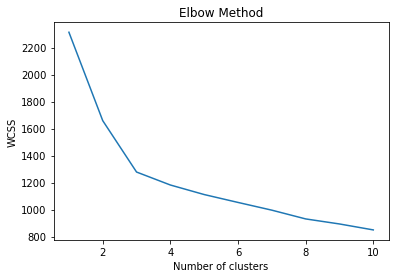

In [23]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(df_sc)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [24]:
from sklearn.cluster import KMeans
clusters_new = KMeans(3, random_state=0)
clusters_new.fit(df_sc)

KMeans(n_clusters=3, random_state=0)

In [25]:
clusters_new.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [26]:
df1['clusterid_new'] = clusters_new.labels_

In [27]:
df1

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clusterid_new
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


In [28]:
clusters_new.cluster_centers_

array([[ 0.83523208, -0.30380968,  0.36470604, -0.61019129,  0.5775868 ,
         0.88523736,  0.97781956, -0.56208965,  0.58028658,  0.17106348,
         0.47398365,  0.77924711,  1.12518529],
       [-0.92607185, -0.39404154, -0.49451676,  0.17060184, -0.49171185,
        -0.07598265,  0.02081257, -0.03353357,  0.0582655 , -0.90191402,
         0.46180361,  0.27076419, -0.75384618],
       [ 0.16490746,  0.87154706,  0.18689833,  0.52436746, -0.07547277,
        -0.97933029, -1.21524764,  0.72606354, -0.77970639,  0.94153874,
        -1.16478865, -1.29241163, -0.40708796]])

In [29]:
df1.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,1.048387,13.676774,1.997903,2.466290,17.462903,107.967742,2.847581,3.003226,0.292097,1.922097,5.453548,1.065484,3.163387,1100.225806
1,1,2.000000,12.250923,1.897385,2.231231,20.063077,92.738462,2.247692,2.050000,0.357692,1.624154,2.973077,1.062708,2.803385,510.169231
2,2,2.941176,13.134118,3.307255,2.417647,21.241176,98.666667,1.683922,0.818824,0.451961,1.145882,7.234706,0.691961,1.696667,619.058824


# PCA

In [51]:
data=pd.read_csv("wine.csv")
data

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [31]:
data.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [32]:
X=data.iloc[:,1:]
y=data.iloc[:,0:1]

In [52]:
y

,Type
0,1
1,1
2,1
3,1
4,1
...,...
173,3
174,3
175,3
176,3


In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=0)

In [35]:
sc=StandardScaler()

In [36]:
X_train= sc.fit_transform(X_train)
X_train

array([[ 0.87668336,  0.79842885,  0.64412971, ...,  0.0290166 ,
        -1.06412236, -0.2059076 ],
       [-0.36659076, -0.7581304 , -0.39779858, ...,  0.0290166 ,
        -0.73083231, -0.81704676],
       [-1.69689407, -0.34424759, -0.32337513, ...,  0.90197362,
         0.51900537, -1.31256499],
       ...,
       [-0.70227477, -0.68615078, -0.65828065, ...,  0.46549511,
         0.51900537, -1.31256499],
       [ 1.13777093, -0.62316862, -0.91876272, ..., -0.18922266,
         1.03282752,  0.80164614],
       [ 1.4610222 ,  0.12361993,  0.42085937, ..., -1.45501034,
        -1.2168803 , -0.2719767 ]])

In [37]:
X_test=sc.transform(X_test)
X_test

array([[ 9.38847070e-01, -6.32166068e-01, -4.35010303e-01,
        -9.19695615e-01,  1.26324041e+00,  5.59998633e-01,
         9.77754158e-01, -1.20637533e+00,  2.36680192e-02,
         3.39284695e-01, -1.45574805e-01,  8.52295413e-01,
         1.04940526e+00],
       [-2.42263344e-01,  2.67579163e-01,  4.20859365e-01,
         7.12764102e-01,  8.40672358e-01, -1.27747161e+00,
        -6.05828120e-01, -9.70634096e-01, -5.87397203e-01,
         2.42611713e+00, -2.06608025e+00, -1.55017035e+00,
        -8.66598582e-01],
       [-7.64438475e-01, -1.11802849e+00, -7.69915825e-01,
        -1.61767889e-01, -9.20027861e-01,  2.03653722e+00,
         1.18341419e+00, -1.36353615e+00,  4.48018868e-01,
        -2.50930538e-01,  1.16386073e+00,  3.94021597e-01,
        -1.06480588e+00],
       [ 7.15057728e-01, -5.78181354e-01,  3.46435916e-01,
         2.75498106e-01,  1.12238439e+00,  1.15061407e+00,
         8.54358136e-01, -1.28495574e+00,  1.43251284e+00,
         5.07917619e-01,  1.16312302e

In [38]:
pca=PCA(n_components=None)

In [39]:
X_train=pca.fit_transform(X_train)
X_test= pca.transform(X_test)

In [40]:
var=pca.explained_variance_ratio_
var

array([0.36884109, 0.19318394, 0.10752862, 0.07421996, 0.06245904,
       0.04909   , 0.04117287, 0.02495984, 0.02308855, 0.01864124,
       0.01731766, 0.01252785, 0.00696933])

In [41]:
var1=np.cumsum(np.round(var, decimals=4)*100)
var1

array([ 36.88,  56.2 ,  66.95,  74.37,  80.62,  85.53,  89.65,  92.15,
        94.46,  96.32,  98.05,  99.3 , 100.  ])

In [42]:
var1=np.cumsum(np.round(var, decimals=4)*100)

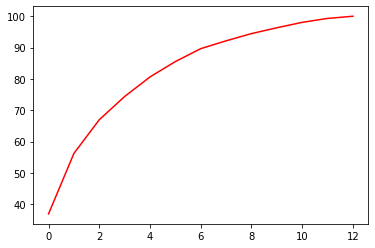

In [68]:
plt.plot(var1, color='red')

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
classifier=LogisticRegression()
classifier.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [46]:
X_test

array([[ 2.20685211e+00, -1.02850086e+00,  1.03796364e+00,
         7.86541231e-01, -2.38958963e-01, -4.37300348e-01,
         3.58875521e-01, -8.58209388e-02,  3.64487503e-01,
        -5.62818276e-01,  2.00192404e-02,  1.63816494e-01,
        -3.40614813e-01],
       [-2.53651962e+00, -1.83644227e+00,  4.82303646e-01,
         1.58478217e+00,  3.68422637e-01,  2.16479716e-01,
         2.05433356e+00,  3.71368375e-02,  9.76698729e-02,
         6.52485724e-01,  2.74384205e-02,  5.56861759e-01,
        -6.45029904e-01],
       [ 2.19183305e+00,  1.81240519e+00, -9.05607041e-02,
        -4.75661208e-01,  4.81797295e-01,  2.26649516e-01,
         1.31282379e+00,  2.90944719e-01,  4.85030214e-01,
         1.06572001e+00,  1.28161243e+00, -4.10407609e-01,
         1.31225329e-01],
       [ 2.51489251e+00, -1.38907803e+00, -4.59264439e-01,
         8.47495738e-01,  2.60005436e-01,  4.10717730e-01,
         6.29012001e-01,  4.20448787e-01, -2.98732959e-01,
        -3.41000647e-01,  5.26428526e

In [54]:
y_pred= classifier.predict(X_test)
y_pred

array([1, 3, 2, 1, 2, 2, 1, 3, 2, 2, 3, 3, 1, 2, 3, 2, 1, 1, 2, 1, 2, 1,
       1, 2, 2, 2, 2, 2, 2, 3, 1, 1, 2, 1, 1, 1], dtype=int64)

In [56]:
y_test=y_test.values

In [57]:
from sklearn.metrics import confusion_matrix

In [58]:
confusion_matrix=confusion_matrix(y_test, y_pred)
confusion_matrix

array([[14,  0,  0],
       [ 0, 16,  0],
       [ 0,  0,  6]], dtype=int64)

In [63]:
X_train

array([[-2.17884511, -1.07218467,  0.07256566, ...,  0.1271222 ,
        -0.07901204,  0.4542412 ],
       [-1.80819239,  1.57822344,  0.00896477, ..., -0.96074782,
        -0.40434955, -0.34098912],
       [ 1.09829474,  2.22124345, -0.1093294 , ...,  1.10392771,
         0.10693966,  0.36900172],
       ...,
       [ 0.01097276,  1.99585453, -0.57933999, ..., -0.11109947,
        -0.01706346, -0.33083897],
       [ 2.89176687, -0.77155548,  1.10218748, ...,  0.13302355,
        -0.17318731, -0.22802702],
       [-2.44830439, -2.11360296,  0.79001847, ..., -0.49170902,
         0.15199135,  0.3013311 ]])

In [65]:
y_train.values

array([[3],
       [2],
       [2],
       [3],
       [1],
       [1],
       [2],
       [2],
       [2],
       [1],
       [3],
       [2],
       [3],
       [1],
       [3],
       [3],
       [1],
       [3],
       [1],
       [2],
       [3],
       [3],
       [2],
       [3],
       [3],
       [1],
       [2],
       [3],
       [2],
       [2],
       [3],
       [2],
       [1],
       [2],
       [2],
       [2],
       [1],
       [1],
       [2],
       [2],
       [3],
       [3],
       [2],
       [2],
       [2],
       [3],
       [3],
       [1],
       [3],
       [2],
       [2],
       [2],
       [2],
       [2],
       [1],
       [1],
       [2],
       [1],
       [3],
       [1],
       [3],
       [1],
       [1],
       [2],
       [1],
       [2],
       [2],
       [1],
       [3],
       [2],
       [1],
       [2],
       [2],
       [2],
       [3],
       [1],
       [3],
       [3],
       [1],
       [1],
       [2],
       [3],
       [1],
    

In [67]:
plt.scatter(X_train[y_train==1,0],X_train[y_train==1,1],label=1)
plt.scatter(X_train[y_train==2,0],X_train[y_train==2,1],label=2)
plt.scatter(X_train[y_train==3,0],X_train[y_train==3,1],label=3)
plt.legend()
plt.show()

IndexError: too many indices for array